This notebook adds some time & seasonality features to the consumption data, to be used as covariates in the sequence models in notebooks 4.0 and 4.1.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_dir = "../data/processed/"

In [3]:
# Load full data, convert time to datetime
df = pd.read_csv(data_dir + "full_data.csv")
df["time"] = pd.to_datetime(df["time"], format = "%d:%m:%Y:%H:%M")

In [4]:
# Drop generation columns
gen_cols = df.columns.values[2:].tolist()
df = df.drop(gen_cols, axis = 1)

In [5]:
# Real-time consumption is available with a 2 hour lag. Shift them back
df["consumption_lag2"] = df["consumption_MWh"].shift(2)
df = df.dropna()

In [6]:
# Add time columns

# Trend
df["trend"] = df.index.values

# Hour of day
hourofday = df.time.dt.hour + 1
df["hour_sin"] = np.sin(2 * np.pi * hourofday / 24)
df["hour_cos"] = np.cos(2 * np.pi * hourofday / 24)

# Day of week
dayofweek = df.time.dt.dayofweek + 1
df["day_sin"] = np.sin(2 * np.pi * dayofweek / 7)
df["day_cos"] = np.cos(2 * np.pi * dayofweek / 7)

# Month
month = df.time.dt.month
df["month_sin"] = np.sin(2 * np.pi * month / 12)
df["month_cos"] = np.cos(2 * np.pi * month / 12)

In [7]:
df

,time,consumption_MWh,consumption_lag2,trend,hour_sin,hour_cos,day_sin,day_cos,month_sin,month_cos
2,2018-01-01 02:00:00,24635.32,27412.81,2,7.071068e-01,7.071068e-01,7.818315e-01,0.62349,5.000000e-01,0.866025
3,2018-01-01 03:00:00,23872.12,26324.39,3,8.660254e-01,5.000000e-01,7.818315e-01,0.62349,5.000000e-01,0.866025
4,2018-01-01 04:00:00,23194.89,24635.32,4,9.659258e-01,2.588190e-01,7.818315e-01,0.62349,5.000000e-01,0.866025
5,2018-01-01 05:00:00,23071.96,23872.12,5,1.000000e+00,6.123234e-17,7.818315e-01,0.62349,5.000000e-01,0.866025
6,2018-01-01 06:00:00,23267.90,23194.89,6,9.659258e-01,-2.588190e-01,7.818315e-01,0.62349,5.000000e-01,0.866025
...,...,...,...,...,...,...,...,...,...,...
52579,2023-12-31 19:00:00,35090.93,34549.42,52579,-8.660254e-01,5.000000e-01,-2.449294e-16,1.00000,-2.449294e-16,1.000000
52580,2023-12-31 20:00:00,33310.94,36193.59,52580,-7.071068e-01,7.071068e-01,-2.449294e-16,1.00000,-2.449294e-16,1.000000
52581,2023-12-31 21:00:00,32083.96,35090.93,52581,-5.000000e-01,8.660254e-01,-2.449294e-16,1.00000,-2.449294e-16,1.000000
52582,2023-12-31 22:00:00,30469.49,33310.94,52582,-2.588190e-01,9.659258e-01,-2.449294e-16,1.00000,-2.449294e-16,1.000000


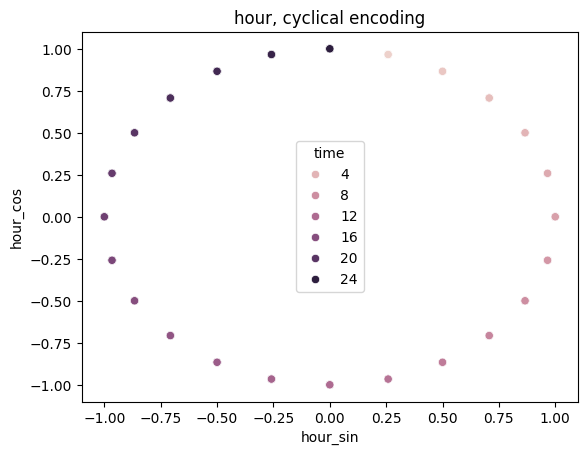

In [8]:
_ = sns.scatterplot(x = df.hour_sin, y = df.hour_cos, hue = hourofday)
_ = plt.title("hour, cyclical encoding")

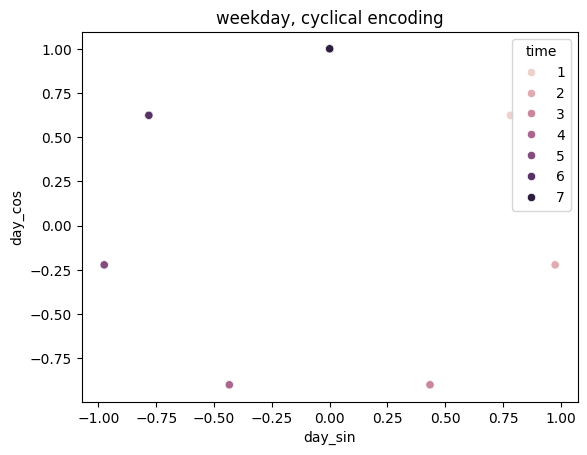

In [9]:
_ = sns.scatterplot(x = df.day_sin, y = df.day_cos, hue = dayofweek)
_ = plt.title("weekday, cyclical encoding")

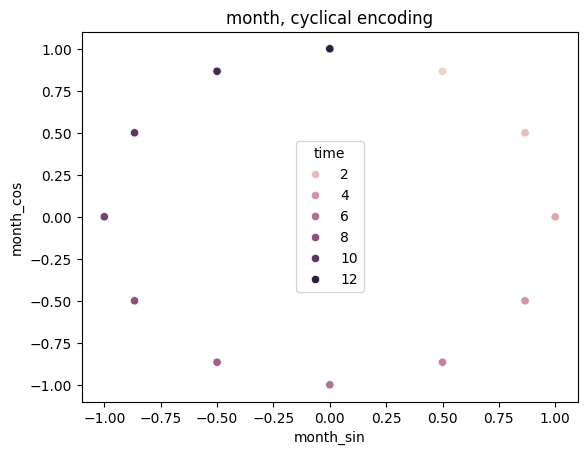

In [10]:
_ = sns.scatterplot(x = df.month_sin, y = df.month_cos, hue = month)
_ = plt.title("month, cyclical encoding")

In [12]:
# Export training data
df.to_csv(data_dir + "train_data.csv", index = False)